### SVM model exercise

Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.
Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class.
Hint: You can use the decision_function method on a grid to get intuitions.

C:\Users\marij\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\marij\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\marij\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\marij\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.7


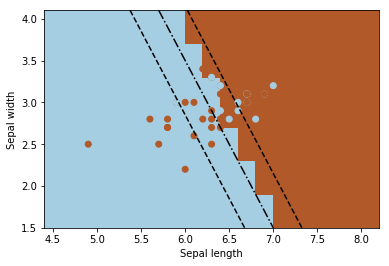

0.6


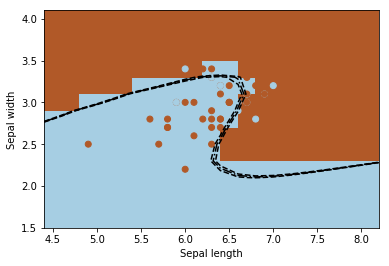

0.6


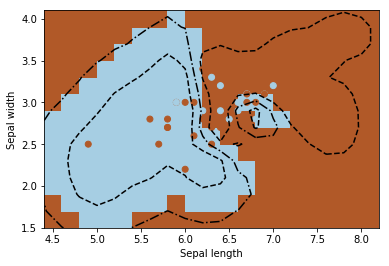

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

# We rename the X feature and y variable. 
iris = datasets.load_iris()
X = iris.data
y = iris.target

# We select the first two features to be included in the X dataset
X = X[y != 0, :2]
y = y[y != 0]

np.random.seed(None)
n_sample=len(X)

# we randomly order the observations in the x and y dataset
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

# We create a training dataset on the first 90% of the randomly sorted data and a test dataset on the remaining 10%.
X_train = X[:.9 * n_sample]
X_test= X[.9 * n_sample:]
y_train= y[:.9 * n_sample]
y_test= y[.9 * n_sample:]

h = 0.2 # step size in the mesh

# To go through this exercise we will use a loop, going through each of the three kernels one after each other
for fig, kernel in enumerate(('linear','poly','rbf')):
    clf=svm.SVC(kernel=kernel, gamma=10) # Gamma is a parameter measuring how far the influence of one training example reaches.
    clf.fit(X_train,y_train) # fit the model to the training data
    print(clf.score(X_test, y_test)) # we score the model on the previously defined test dataset
    
    plt.figure(fig) # we plot the figure for each of the defined kernel. 
    plt.clf() # we clear the figure currently there
   
    # With the code below we define the grid on which the function will be plotted. 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #the decision function, amongst other things, adds the decision boundary
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    # we reshape the decision function to fit the defined grid
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired) # gives the background the colour
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-.', '--'], levels=[-.5, 0, .5]) # we plot the contours

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired) # we plot the different datapoints/observations
        
    plt.xlabel('Sepal length') # we relabel the axis to match the dataset
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max()) # we set the axe limits to match the minimum and maximum defined for xx and yy
    plt.ylim(yy.min(), yy.max())
        
    plt.show() # we show the plot for each of the three kernels

### Plotting the Cross Validation Score exercise

On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10).

Accuracy: = 0.156 (+/- 0.15)
Accuracy: = 0.156 (+/- 0.15)
Accuracy: = 0.156 (+/- 0.15)
Accuracy: = 0.156 (+/- 0.15)
Accuracy: = 0.156 (+/- 0.15)
Accuracy: = 0.903 (+/- 0.01)
Accuracy: = 0.948 (+/- 0.03)
Accuracy: = 0.945 (+/- 0.02)
Accuracy: = 0.944 (+/- 0.02)
Accuracy: = 0.944 (+/- 0.02)


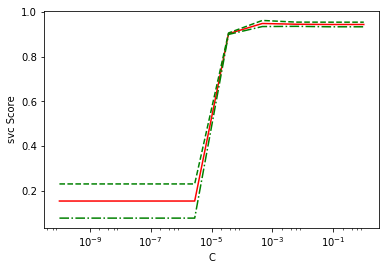

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data # defining the feature dataset
y = digits.target # defining the to be explained y variable

svc = svm.SVC(kernel='linear') # Linear support vector classification
C_s = np.logspace(-10, 0, 10) # we define the C to be logarithmic between -10 and 0 and to be plotted for 10 equal steps

scores = list() # we define two lists two which we will append the values
scores2 = list()

for C in C_s: # we use a for loop to estimate the SVC estimator every value of C.
    svc.C = C
    scoring = cross_val_score(svc, X, y) #Returns an array of scores of the estimator for each run of the cross validation.
    scores.append(np.mean(scoring)) #Adds the mean of the scores estimated in last step to the list
    scores2.append(np.std(scoring)) #Adds the std of the scores estimated in the last step to the list
    print("Accuracy: = %0.3f (+/- %0.2f)" %(scoring.mean(), scoring.std()* 2)) 
    #0.2 sets the decimal places. This shows the mean and the 95% confidence interval    
    
#Plotting the function
plt.clf() #clear the current figure
plt.autoscale(enable = True, axis = 'y', tight = None) #scales y axis automatically
plt.semilogx(C_s,scores,'r') # plots the mean score on the logarithmic x-axis
plt.semilogx(C_s,np.array(scores)+np.array(scores2),'g--') #add std to mean using numpy array to keep dimensions
plt.semilogx(C_s,np.array(scores)-np.array(scores2),'g-.') #substract std from mean using numpy arrays

plt.ylabel('svc Score')
plt.xlabel('C')

plt.show()

### Optimizing the regularization parameter exercise 

On the diabetes dataset, find the optimal regularization parameter alpha.
Bonus: How much can you trust the selection of alpha?

442


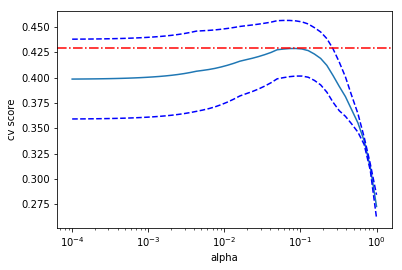

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()

print(len(diabetes.data)) # we print the number of observations in the set, this is 442.

X = diabetes.data[:200] # we define the training data and leave out the last 200 observations
y = diabetes.target[:200]

lasso = Lasso(random_state = 0) # A lasso uses coordinate descent to fit the parameters. 
alphas = np.logspace(-4,0) # alphas are between logs of -4 and 0 and are the optimization parameter for which the model is fitted. 

n = 3 # number of times the dataset is split for the cross validation scoring

scores = list() # we define two lists to append the mean and standard deviation for each cross validation score to.
scores2 = list()
for alpha in alphas:
    lasso.alpha = alpha
    scoring = cross_val_score(lasso, X, y, cv = n, n_jobs = 1) 
    scores.append(np.mean(scoring))
    scores2.append(np.std(scoring))

#Plot alpha
plt.clf() #clear the current figure
plt.autoscale(enable = True, axis = 'y', tight = None) #scales y axis automatically
plt.semilogx(alphas,scores) # plots the mean score on the logarithmic x-axis

st_dev = np.array(scores2)
sq_err = st_dev/np.sqrt(n) #calculate standard error to show the variability of the estimator

plt.semilogx(alphas,np.array(scores)+sq_err,'b--') #add st error to mean using numpy array 
plt.semilogx(alphas,np.array(scores)-sq_err,'b--') #substract st error from mean using numpy arrays

#the maximum value for alpha is where the derivative = 0 and where alpha is thus optimized
plt.axhline(np.array(scores).max(),linestyle = '-.', color = 'r')
plt.ylabel('cv score')
plt.xlabel('alpha')

plt.show()

In [5]:
# we can evaluate the credibility of alpha by comparing the alphas obtained using the lassoCV function for different folds
# in the data

from sklearn.linear_model import LassoCV
 
kfold = KFold(5) #we divide the data in 5 subsets
lasso_cv = LassoCV(alphas=alphas, random_state=0) #the LassoCV has iterative fittings whereas the lasso algorithm has not.

for kfold, (train, test) in enumerate(kfold.split(X,y)): # we use a loop to fit the training data to each subset of the data 
    lasso_cv.fit(X[train],y[train]) 
    print("Alpha is: %.5f and score is %.5f " %(lasso_cv.alpha_,lasso_cv.score(X[test],y[test]))) 
    # we print the alpha for each iteration and the score for each time we fit the data.
    
# The alphas differ quite a bit from subset to subset, as do the scores. Hence, the estimator alpha is probably not very accurate.

Alpha is: 0.08685 and score is 0.51499 
Alpha is: 0.05964 and score is 0.19713 
Alpha is: 0.04942 and score is 0.46184 
Alpha is: 0.07197 and score is 0.53716 
Alpha is: 0.04942 and score is 0.41163 
